In [4]:
import os
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
energy_exact = 0
data_dir = "phosphate_data"
all_files = os.listdir(data_dir)
data_files = [f for f in all_files if "eigenvalues" in f]
for f in data_files:
    print(f)

phosphate_eigenvalues_1.json
phosphate_eigenvalues_0.json
phosphate_eigenvalues_2.json


In [11]:
dfs = []
for ev in data_files:
    fname = data_dir + "/" + ev
    # Get the number of steps.
    f = h5py.File(fname, "r")
    steps = f["steps"][()]
    f.close()
    # Get the upper bound.
    # fname2 = fname.replace("eigenvalues", "bound")
    # bound_df = pd.read_hdf(fname2)
    # Get the dataframe with energy vs. d
    df = pd.read_hdf(fname, key="eigenvalues")
    df["error"] = abs(df["energy"] - energy_exact)
    df["steps"] = steps
    # df["num_2q"] = steps * num_cnot
    df.set_index("d")
    # df_concat = pd.concat([df, bound_df], axis=1)
    # dfs.append(df_concat)
    dfs.append(df)
big_df = pd.concat(dfs)
print(big_df.head())

   d           eps    energy  num_pos     error  steps
i                                                     
0  3  1.000000e-08 -7.914475        3  7.914475     10
1  4  1.000000e-08 -7.926490        3  7.926490     10
2  5  1.000000e-08 -7.932954        3  7.932954     10
3  6  1.000000e-08 -7.938170        4  7.938170     10
4  7  1.000000e-08 -7.942172        4  7.942172     10


<Axes: xlabel='steps', ylabel='energy'>

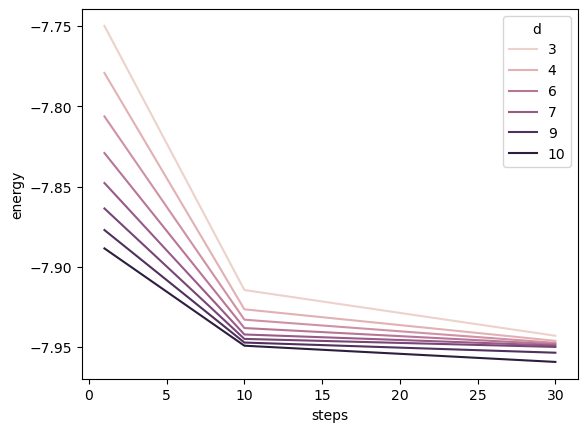

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=big_df, ax=ax, x="steps", y="energy", hue="d")